<a href="https://colab.research.google.com/github/yuanhsiaoai/classroom_v1.1/blob/main/%E4%B8%8A%E8%AA%B2%E7%94%A8%E6%AA%94%E6%A1%88_%E8%BC%94%E5%A4%A7regression11_student_v1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 呼叫套件

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.formula.api as sm
import statsmodels.stats.api as sms

import matplotlib as mpl
import matplotlib.font_manager as fm

import seaborn as sns
from seaborn import pairplot
from statsmodels.graphics.correlation import plot_corr

from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score,mean_squared_error

import scipy
from scipy.stats import shapiro

from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from IPython.display import Image

from io import StringIO
import pydotplus

# 讀入資料


- 先從本地端將資料上傳至暫存空間

```python
# Note
df1 = pd.read_excel("",sheet_name="")
```

- 第一個位置填入「完整檔案路徑(含檔名）」
- 第二個位置填入「分頁名稱」

In [2]:
df1 = pd.read_excel("/content/企排資料.xlsx",sheet_name="男子組_001")#

In [3]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 120 entries, 0 to 119
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   賽事      120 non-null    object
 1   排名      120 non-null    int64 
 2   隊伍      120 non-null    object
 3   No      120 non-null    int64 
 4   球員      120 non-null    object
 5   位置      120 non-null    object
 6   場數      120 non-null    int64 
 7   局數      120 non-null    int64 
 8   攻擊得分    120 non-null    int64 
 9   攔網得分    120 non-null    int64 
dtypes: int64(6), object(4)
memory usage: 9.5+ KB


In [4]:
# 秀前n筆資料
df1.head(10)

,賽事,排名,隊伍,No,球員,位置,場數,局數,攻擊得分,攔網得分
0,TVL-19,1,連莊排球隊,1,B.BAGUNAS,長攻,20,73,387,29
1,TVL-19,2,雲林美津濃,77,温逸凱,長攻,20,74,299,31
2,TVL-19,3,雲林美津濃,69,洪榮發,對角,20,74,293,29
3,TVL-19,4,桃園臺灣產險,12,劉昱麟,長攻,20,75,268,36
4,TVL-19,5,桃園臺灣產險,99,李尼希米,長攻,20,75,278,11
5,TVL-19,6,彰化三大有線,5,陳恩得,對角,20,72,252,34
6,TVL-19,7,臺北Conti,18,雷諾,長攻,20,68,205,25
7,TVL-19,8,連莊排球隊,11,吳宗軒,對角,20,73,178,35
8,TVL-19,9,臺北Conti,4,李元,長攻,20,68,211,13
9,TVL-19,10,連莊排球隊,9,施琅,長攻,20,73,187,30


In [5]:
# 秀出最後n筆資料
df1.tail()

,賽事,排名,隊伍,No,球員,位置,場數,局數,攻擊得分,攔網得分
115,TVL-14,16,conti,10,張昇倫,攔中,24,88,109,32
116,TVL-14,17,conti,18,陳立偉,長攻,24,88,134,8
117,TVL-14,18,台電公司,16,顏振富,攔中,24,90,102,25
118,TVL-14,19,台電公司,18,許紋誠,長攻,24,90,98,8
119,TVL-14,20,MIZUNO,15,陳昱翰,攔中,24,95,51,50


In [6]:
# 印出所有欄位名稱
df1.columns

Index(['賽事', '排名', '隊伍', 'No', '球員', '位置', '場數', '局數', '攻擊得分', '攔網得分'], dtype='object')

# 將欄位No改為背號

```python
# Note
df1 = df1.rename(columns={"":""})
```

- 第一個位置填入「原始欄位名稱」
- 第二個位置填入「修改後欄位名稱」

In [7]:
df1 = df1.rename(columns={"No":"背號"})#

In [8]:
df1.columns

Index(['賽事', '排名', '隊伍', '背號', '球員', '位置', '場數', '局數', '攻擊得分', '攔網得分'], dtype='object')

# Column與Rows的篩選方式

- 一個欄位直接呈現
- 複數欄位以list形式呈現

In [9]:
#df1['隊伍']
df1[['隊伍','球員']]

,隊伍,球員
0,連莊排球隊,B.BAGUNAS
1,雲林美津濃,温逸凱
2,雲林美津濃,洪榮發
3,桃園臺灣產險,劉昱麟
4,桃園臺灣產險,李尼希米
...,...,...
115,conti,張昇倫
116,conti,陳立偉
117,台電公司,顏振富
118,台電公司,許紋誠


- 「 : 」 表示數字連續

In [10]:
df1[110:]#

,賽事,排名,隊伍,背號,球員,位置,場數,局數,攻擊得分,攔網得分
110,TVL-14,11,長力男排,10,潘均儒,對角,24,91,165,13
111,TVL-14,11,台電公司,13,黃建逢,長攻,24,90,146,18
112,TVL-14,13,MIZUNO,6,謝雅仁,長攻,24,95,136,18
113,TVL-14,14,長力男排,17,柯宗甫,攔中,24,91,120,33
114,TVL-14,15,長力男排,18,林輅惟,攔中,24,91,106,45
115,TVL-14,16,conti,10,張昇倫,攔中,24,88,109,32
116,TVL-14,17,conti,18,陳立偉,長攻,24,88,134,8
117,TVL-14,18,台電公司,16,顏振富,攔中,24,90,102,25
118,TVL-14,19,台電公司,18,許紋誠,長攻,24,90,98,8
119,TVL-14,20,MIZUNO,15,陳昱翰,攔中,24,95,51,50


In [11]:
df1.iloc[[1,3,6]]#

,賽事,排名,隊伍,背號,球員,位置,場數,局數,攻擊得分,攔網得分
1,TVL-19,2,雲林美津濃,77,温逸凱,長攻,20,74,299,31
3,TVL-19,4,桃園臺灣產險,12,劉昱麟,長攻,20,75,268,36
6,TVL-19,7,臺北Conti,18,雷諾,長攻,20,68,205,25


In [12]:
df1.iloc[[1,3,6]]['球員']

,球員
1,温逸凱
3,劉昱麟
6,雷諾


In [13]:
df1['球員'].iloc[[1,3,6]]

,球員
1,温逸凱
3,劉昱麟
6,雷諾


# 條件篩選

``` python
# Note
# 攻擊得分超過350分的資料
df1[]
```
- 放入條件

In [14]:
# 攻擊得分超過350分的資料
df1[df1['攻擊得分']>350]#

,賽事,排名,隊伍,背號,球員,位置,場數,局數,攻擊得分,攔網得分
0,TVL-19,1,連莊排球隊,1,B.BAGUNAS,長攻,20,73,387,29
20,TVL-18,1,連莊,1,Bryan,長攻,20,77,453,40
60,TVL-16,1,臺中長力,9,高偉誠,長攻,24,100,498,36
61,TVL-16,2,雲林Mizuno,1,黃正良,對角,24,104,438,36
100,TVL-14,1,MIZUNO,11,吳宗軒,對角,24,95,440,28


- 多個條件用「&」或「｜」


In [15]:
# 攻擊得分超過350分且攔網得分超過30分的資料
df1[(df1['攻擊得分']>350) & (df1['攔網得分']>30)]#

,賽事,排名,隊伍,背號,球員,位置,場數,局數,攻擊得分,攔網得分
20,TVL-18,1,連莊,1,Bryan,長攻,20,77,453,40
60,TVL-16,1,臺中長力,9,高偉誠,長攻,24,100,498,36
61,TVL-16,2,雲林Mizuno,1,黃正良,對角,24,104,438,36


In [16]:
df1[df1['攻擊得分']>350][df1['攔網得分']>30]

<ipython-input-16-b6fbb10637b0>:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df1[df1['攻擊得分']>350][df1['攔網得分']>30]


,賽事,排名,隊伍,背號,球員,位置,場數,局數,攻擊得分,攔網得分
20,TVL-18,1,連莊,1,Bryan,長攻,20,77,453,40
60,TVL-16,1,臺中長力,9,高偉誠,長攻,24,100,498,36
61,TVL-16,2,雲林Mizuno,1,黃正良,對角,24,104,438,36


# 合併資料

In [17]:
df2 = pd.read_excel("/content/企排資料.xlsx",sheet_name="男子組_002")

# 資料合併的方式
- left join
- right join
- inner join
- outer join / full join

In [18]:
df = pd.merge(df1, df2, on=['賽事', '球員', '排名', '隊伍', '位置'], how='outer')
df

,賽事,排名,隊伍,背號,球員,位置,場數,局數,攻擊得分,攔網得分,No,發球得分
0,TVL-14,1,MIZUNO,11,吳宗軒,對角,24,95,440,28,11,34
1,TVL-14,8,conti,12,宋柏霆,長攻,24,88,198,15,12,10
2,TVL-14,4,台電公司,15,張善源,長攻,24,90,253,34,15,9
3,TVL-14,16,conti,10,張昇倫,攔中,24,88,109,32,10,5
4,TVL-14,10,台電公司,10,張育陞,對角,24,90,159,21,10,21
...,...,...,...,...,...,...,...,...,...,...,...,...
115,TVL-19,11,屏東台電,18,許紋誠,長攻,20,72,184,21,18,10
116,TVL-19,19,雲林美津濃,12,許美中,長攻,20,74,120,16,12,6
117,TVL-19,6,彰化三大有線,5,陳恩得,對角,20,72,252,34,5,10
118,TVL-19,7,臺北Conti,18,雷諾,長攻,20,68,205,25,18,6


# 衍生變數

In [19]:
# 新增一個欄位叫做總得分
df['總得分'] = df['攻擊得分'] + df['攔網得分'] + df['發球得分']

In [20]:
# 新增一個欄位叫做平均得分(總得分/局數)
df['平均得分'] = round(df['總得分'] / df['局數'],2)
df

,賽事,排名,隊伍,背號,球員,位置,場數,局數,攻擊得分,攔網得分,No,發球得分,總得分,平均得分
0,TVL-14,1,MIZUNO,11,吳宗軒,對角,24,95,440,28,11,34,502,5.28
1,TVL-14,8,conti,12,宋柏霆,長攻,24,88,198,15,12,10,223,2.53
2,TVL-14,4,台電公司,15,張善源,長攻,24,90,253,34,15,9,296,3.29
3,TVL-14,16,conti,10,張昇倫,攔中,24,88,109,32,10,5,146,1.66
4,TVL-14,10,台電公司,10,張育陞,對角,24,90,159,21,10,21,201,2.23
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
115,TVL-19,11,屏東台電,18,許紋誠,長攻,20,72,184,21,18,10,215,2.99
116,TVL-19,19,雲林美津濃,12,許美中,長攻,20,74,120,16,12,6,142,1.92
117,TVL-19,6,彰化三大有線,5,陳恩得,對角,20,72,252,34,5,10,296,4.11
118,TVL-19,7,臺北Conti,18,雷諾,長攻,20,68,205,25,18,6,236,3.47


In [21]:
# 新增一個欄位叫做性別
df['性別'] = '男'

In [22]:
# 刪除欄位No
df = df.drop(columns=['No'])#

In [23]:
df.head(3)

,賽事,排名,隊伍,背號,球員,位置,場數,局數,攻擊得分,攔網得分,發球得分,總得分,平均得分,性別
0,TVL-14,1,MIZUNO,11,吳宗軒,對角,24,95,440,28,34,502,5.28,男
1,TVL-14,8,conti,12,宋柏霆,長攻,24,88,198,15,10,223,2.53,男
2,TVL-14,4,台電公司,15,張善源,長攻,24,90,253,34,9,296,3.29,男


# 敘述統計

In [24]:
df.info()#

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 120 entries, 0 to 119
Data columns (total 14 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   賽事      120 non-null    object 
 1   排名      120 non-null    int64  
 2   隊伍      120 non-null    object 
 3   背號      120 non-null    int64  
 4   球員      120 non-null    object 
 5   位置      120 non-null    object 
 6   場數      120 non-null    int64  
 7   局數      120 non-null    int64  
 8   攻擊得分    120 non-null    int64  
 9   攔網得分    120 non-null    int64  
 10  發球得分    120 non-null    int64  
 11  總得分     120 non-null    int64  
 12  平均得分    120 non-null    float64
 13  性別      120 non-null    object 
dtypes: float64(1), int64(8), object(5)
memory usage: 13.2+ KB


In [25]:
#對df做敘述統計
df.describe().T#

,count,mean,std,min,25%,50%,75%,max
排名,120.0,10.466667,5.784554,1.00,5.75,10.500,15.25,20.00
背號,120.0,14.491667,15.919438,1.00,8.00,11.000,18.00,99.00
場數,120.0,21.091667,2.428804,9.00,20.00,20.000,24.00,24.00
局數,120.0,79.650000,11.357928,36.00,73.00,76.000,90.00,104.00
攻擊得分,120.0,197.750000,88.612104,51.00,132.50,178.000,255.00,498.00
攔網得分,120.0,26.075000,13.857111,4.00,16.00,25.000,33.25,73.00
發球得分,120.0,10.325000,7.004395,1.00,5.00,9.000,13.00,41.00
總得分,120.0,234.150000,93.642324,97.00,160.00,215.000,294.00,554.00
平均得分,120.0,2.967500,1.145681,1.09,2.01,2.795,3.67,6.75


In [26]:
#對df表裡的攻擊得分、攔網得分...做敘述統計
df[['攻擊得分','攔網得分','發球得分','總得分']].describe().T#

,count,mean,std,min,25%,50%,75%,max
攻擊得分,120.0,197.750,88.612104,51.0,132.5,178.0,255.00,498.0
攔網得分,120.0,26.075,13.857111,4.0,16.0,25.0,33.25,73.0
發球得分,120.0,10.325,7.004395,1.0,5.0,9.0,13.00,41.0
總得分,120.0,234.150,93.642324,97.0,160.0,215.0,294.00,554.0


In [27]:
df['位置'].value_counts()#

,count
位置,
長攻,64
對角,31
攔中,25


# 作圖
- 先導入中文字體

In [28]:
!wget -O TaipeiSansTCBeta-Regular.ttf https://drive.google.com/uc?id=1eGAsTN1HBpJAkeVM57_C7ccp7hbgSz3_&export=download

--2024-11-15 01:15:49--  https://drive.google.com/uc?id=1eGAsTN1HBpJAkeVM57_C7ccp7hbgSz3_
Resolving drive.google.com (drive.google.com)... 142.251.2.101, 142.251.2.113, 142.251.2.100, ...
Connecting to drive.google.com (drive.google.com)|142.251.2.101|:443... connected.
HTTP request sent, awaiting response... 303 See Other
Location: https://drive.usercontent.google.com/download?id=1eGAsTN1HBpJAkeVM57_C7ccp7hbgSz3_ [following]
--2024-11-15 01:15:49--  https://drive.usercontent.google.com/download?id=1eGAsTN1HBpJAkeVM57_C7ccp7hbgSz3_
Resolving drive.usercontent.google.com (drive.usercontent.google.com)... 142.250.141.132, 2607:f8b0:4023:c0b::84
Connecting to drive.usercontent.google.com (drive.usercontent.google.com)|142.250.141.132|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 20659344 (20M) [application/octet-stream]
Saving to: ‘TaipeiSansTCBeta-Regular.ttf’

TaipeiSansTCBeta-Re 100%[===================>]  19.70M  48.9MB/s    in 0.4s    

2024-11-15 01:15:53

In [29]:
fm.fontManager.addfont('TaipeiSansTCBeta-Regular.ttf')
mpl.rc('font', family='Taipei Sans TC Beta')

Text(0.5, 1.0, 'Scatter plot')

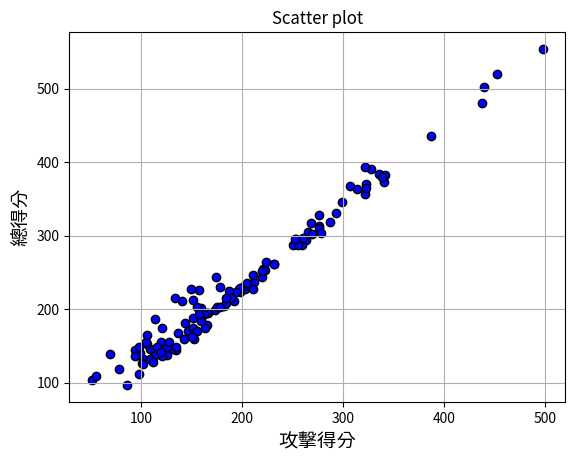

In [30]:
plt.scatter(x=df['攻擊得分'],y=df['總得分'],color='blue',edgecolor='k') #
plt.grid(True)
plt.xlabel('攻擊得分',fontsize=14)
plt.ylabel('總得分',fontsize=14)
plt.title('Scatter plot')

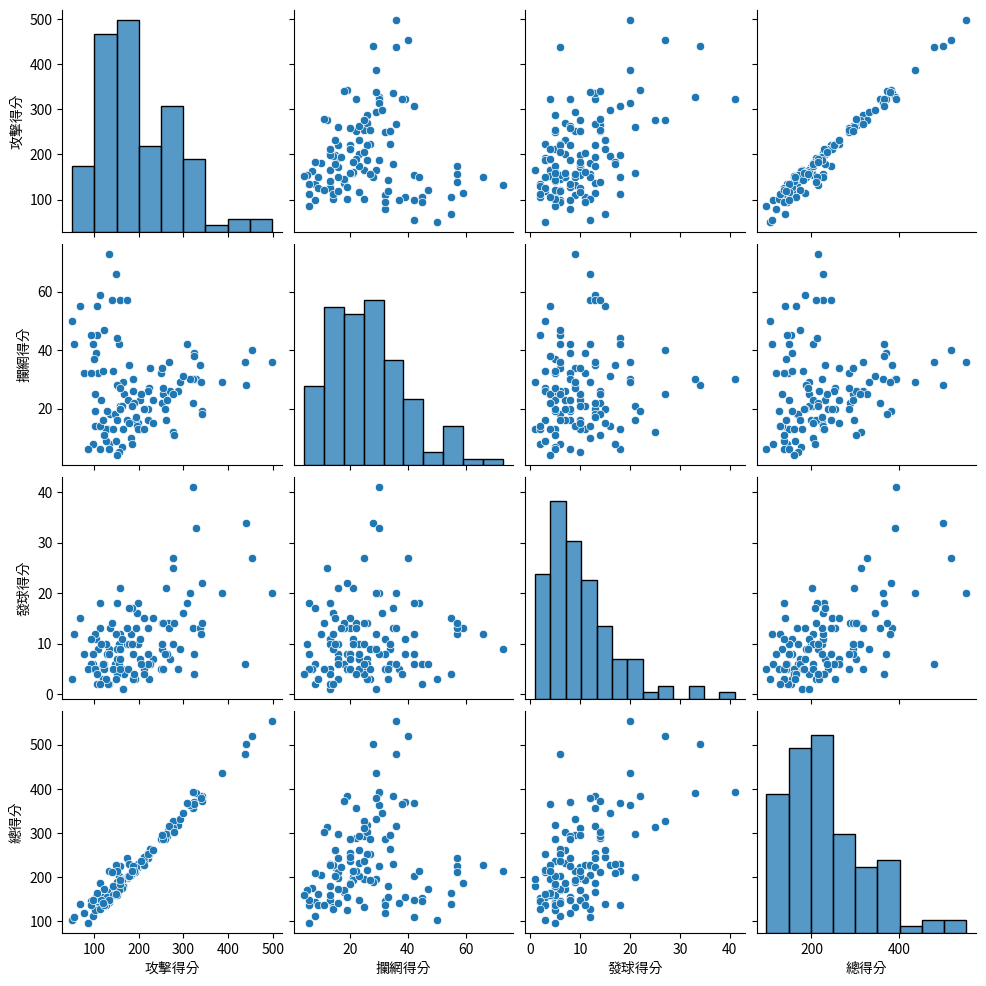

In [31]:
from seaborn import pairplot
pairplot(df[['攻擊得分','攔網得分','發球得分','總得分']])

In [32]:
corr = df[['攻擊得分','攔網得分','發球得分','總得分']].corr()#
corr

,攻擊得分,攔網得分,發球得分,總得分
攻擊得分,1.000000,0.008994,0.513006,0.985986
攔網得分,0.008994,1.000000,0.086498,0.162960
發球得分,0.513006,0.086498,1.000000,0.573048
總得分,0.985986,0.162960,0.573048,1.000000


# 機器學習任務-迴歸：用攻擊得分來預測總得分

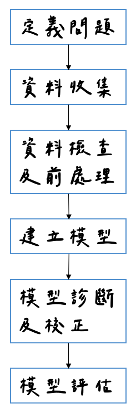

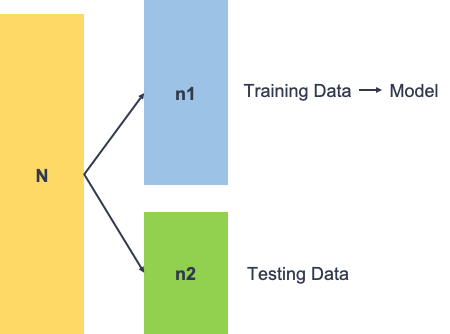

In [33]:
#train_test_split
# (1) 原始資料表 (2)測試資料筆數比例 (3)隨機種子
train,test = train_test_split(df,test_size=0.2,random_state=333) #

## 目標:用攻擊得分預測總得分
## 迴歸方程式: 總得分(y) = a*攻擊得分(x) + b
## 程式碼寫法: 總得分~攻擊得分

In [34]:
#.ols -> ordinary least squares method
model1=sm.ols(formula="總得分~攻擊得分", data=train)#
fitted = model1.fit()
print(fitted.summary())

                            OLS Regression Results                            
Dep. Variable:                    總得分   R-squared:                       0.977
Model:                            OLS   Adj. R-squared:                  0.977
Method:                 Least Squares   F-statistic:                     3949.
Date:                Fri, 15 Nov 2024   Prob (F-statistic):           1.38e-78
Time:                        01:15:59   Log-Likelihood:                -394.68
No. Observations:                  96   AIC:                             793.4
Df Residuals:                      94   BIC:                             798.5
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     26.4052      3.762      7.019      0.0

迴歸方程式:總得分=1.0488*攻擊得分+26
在其他條件不變的情況下，攻擊得分每多一分，總得分會增加1.04分

# 迴歸方程式與績效指標


In [35]:
# 方程式係數
fitted.params

,0
Intercept,26.405204
攻擊得分,1.048823


In [36]:
rsq = r2_score(fitted.fittedvalues,train['總得分'])
print('R square :',rsq)

R square : 0.9761983424232881


# 預測

In [ ]:
#預測時使用跟build model時相同的feature
y_head = fitted.predict(test['攻擊得分'])#
y_head

In [38]:
pre = pd.DataFrame(y_head) #將預測結果存成一張data frame
pre['real_value'] = test['總得分'] # 在data frame新增一個欄位"_real_value"，存放測試資料的總得分(正確答案)
pre = pre.rename(columns = {0:'predict_value'}) # 重新命名欄位名稱
pre.head()

,predict_value,real_value
28,163.800957,146
117,290.708484,296
96,176.386827,181
33,124.994523,145
48,188.972698,203


In [39]:
mse = mean_squared_error(pre['real_value'],pre['predict_value'])
print('Mean Squared Error :',mse)

Mean Squared Error : 340.3140061534579


# 複回歸

## 情境:用攻擊得分與攔網得分預測總得分

- 迴歸方程式: 總得分(y) = a*攻擊得分(x1) + b*攔網得分(x2) + c
- 程式碼寫法: 總得分~攻擊得分+攔網得分

In [ ]:
#.ols -> ordinary least squares method
model2=sm.ols(formula="", data=train)#
fitted = model2.fit()
print(fitted.summary())

In [ ]:
y_head = fitted.predict(test[])#

In [ ]:
pre = pd.DataFrame(y_head)
pre['real_value'] = test['總得分']
pre = pre.rename(columns = {0:'predict_value'})
pre.head()

In [ ]:
mse = mean_squared_error(pre['real_value'],pre['predict_value'])
print('Mean Squared Error :',mse)

# 機器學習任務-分類：用各項得分來分類位置

In [ ]:
sns.pairplot(df[['攻擊得分','攔網得分','發球得分','總得分','位置']],hue='位置')

In [ ]:
clf = tree.DecisionTreeClassifier()
model_tree = clf.fit(train[['攻擊得分','攔網得分','發球得分','總得分']], train['位置'])

In [ ]:
test_y_predicted = model_tree.predict(test[['攻擊得分','攔網得分','發球得分','總得分']])
print(test['位置'].values)
print("==================")
print(test_y_predicted)

In [ ]:
accuracy = metrics.accuracy_score(test['位置'], test_y_predicted)
print(accuracy)

In [ ]:
confusion_matrix(test['位置'], test_y_predicted)

In [ ]:
y_name = np.array(['長攻','對角','攔中'])
dot_data = StringIO()
tree.export_graphviz(clf,out_file = dot_data,feature_names=list(train[['攻擊得分','攔網得分','發球得分','總得分']].columns.values),
                     class_names=y_name,filled=True,rounded=True,
                     special_characters=True)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
graph.write_svg("Tree.svg")

True